---
layout: post
title: python 之窗函数
category: math
tags: [math, ai, python]
---

# python 之窗函数

在数字信号处理中，由于只能使用有限个时域数据进行傅立叶变换，因此需要对时域数据进行截断处理。

信号截断分为周期截断和非周期截断。

* 周期截断是指截断后的信号为周期信号，这种截断不会导致频谱泄漏。
* 非周期截断是指截断后的信号不再是周期信号，哪怕原始信号本身是周期信号，这中截断会导致频谱泄漏。

为了减少截断导致的频谱泄漏，我们需要使用窗函数对截断的信号进行处理。

窗函数相关总结：

* 主瓣越窄，频率分辨越准确
* 旁瓣越高，说明能量泄漏越严重
* 旁瓣衰减越慢，频谱拖尾越严重

## 周期且倍数截断

当对周期时域数据进行截断时，只要保证傅立叶变换的 N 个时域点包含完整的周期即可保证频谱不泄漏。
实验方法如下：

* 使用采样频率为 8000 Hz, 使用 N = 512 个采样点进行傅立叶变换（采样分辨率为 15.625 Hz)
* 令原始信号包含 156.25 和 234.375 两个正弦信号
* 不加窗（默认为矩形窗）对原始进行傅立叶变换，查看 FFT 变换是否有频谱泄漏

<IPython.core.display.Javascript object>


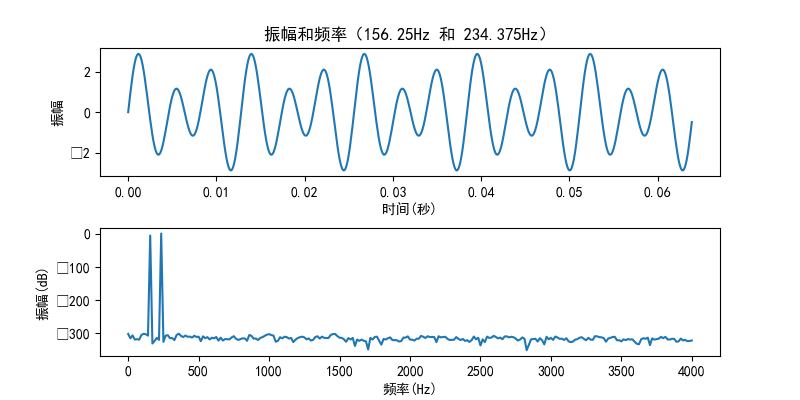

In [48]:
%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

sample_rate = 8000

fft_size  = 512

t = np.arange(0, 1.1, 1.0/sample_rate)

## 两个正弦信号，频率分辨为 156.25 和 234.375
x = np.sin(2*np.pi*156.25*t) + 2*np.sin(2*np.pi*234.375*t)

## 取 N 个采样点进行 FFT 变换
# rfft 函数的返回 N/2+1 个复数，分别表示从 0(Hz) ~ fs/2 频率分量
xs = x[:fft_size]
xf = np.fft.rfft(xs) / fft_size

## 生成频率和振幅(dB)
freqs = np.linspace(0, sample_rate/2, int(fft_size/2 + 1))
xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e1000))


## 画出波形及其频谱图
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t[:fft_size], xs)
plt.xlabel("时间(秒)")
plt.ylabel("振幅")
plt.title("振幅和频率（156.25Hz 和 234.375Hz）")

plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel("频率(Hz)")
plt.ylabel("振幅(dB)")

plt.subplots_adjust(hspace=0.4)
plt.show()

从上面的图形可以看出，FFT 变换可以准确的计算出 156.25 和 234.375 两个频率点，未发生频谱泄漏。

下面我们用同样的方法试一下 100Hz （非 15.625Hz 倍数）时，FFT 变化出来的频谱图。


<IPython.core.display.Javascript object>


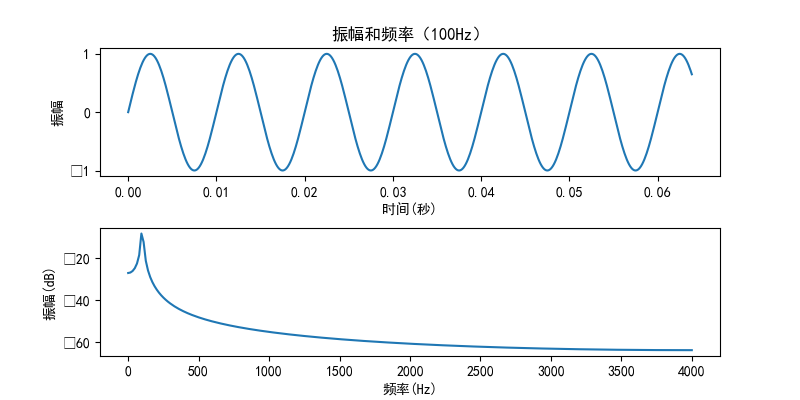

In [49]:
## 100Hz 正弦信号，不是 15.625 倍数时，出现频谱泄漏
x = np.sin(2*np.pi*100*t)


## 取 N 个采样点进行 FFT 变换
# rfft 函数的返回 N/2+1 个复数，分别表示从 0(Hz) ~ fs/2 频率分量
xs = x[:fft_size]
xf = np.fft.rfft(xs) / fft_size

## 生成频率和振幅(dB)
freqs = np.linspace(0, sample_rate/2, int(fft_size/2+1))
xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e1000))


## 画出波形及其频谱图
plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(t[:fft_size], xs)
plt.xlabel("时间(秒)")
plt.ylabel("振幅")
plt.title("振幅和频率（100Hz）")

plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel("频率(Hz)")
plt.ylabel("振幅(dB)")

plt.subplots_adjust(hspace=0.4)
plt.show()

上面频谱图看出，100Hz 信号使用 512 点 FFT 变换后频谱泄漏严重。

100Hz 峰值处的幅值减小，泄漏到整个频带的其他谱线上。频谱图已经不能准确反映原始信号的频率了。



<IPython.core.display.Javascript object>


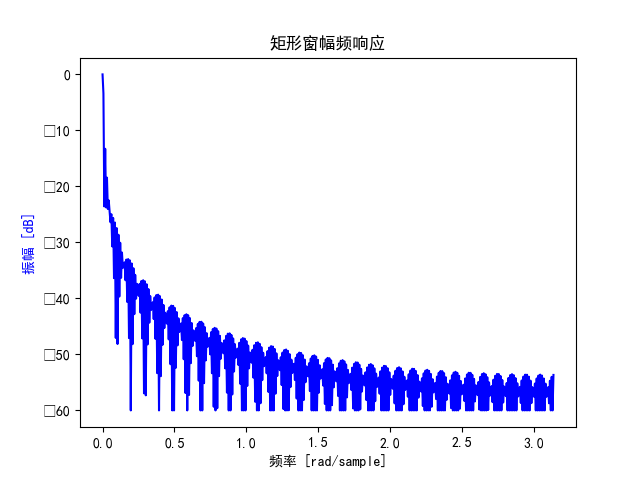

In [17]:
%matplotlib notebook
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

WINDOW_SIZE = 480

k = np.arange(0, WINDOW_SIZE, 1)

## 矩形窗
rect_window = np.ones(WINDOW_SIZE) / WINDOW_SIZE
rect_w, rect_h = signal.freqz(rect_window)


fig = plt.figure()
plt.title('矩形窗幅频响应')

# ax1 = fig.add_subplot(1,1,1)
plt.plot(rect_w, 20 * np.log10(np.clip(np.abs(rect_h), 1e-3, 1e100)), 'b')
plt.ylabel('振幅 [dB]', color='b')
plt.xlabel('频率 [rad/sample]')

# plt.twinx()
# rect_angles = np.unwrap(np.angle(rect_h))
# plt.plot(rect_w, rect_angles, 'g')
# plt.ylabel('相频 (radians)', color='g')
# plt.grid()
# plt.axis('tight')

plt.show()


## Vorbis 窗
vorbis_window = np.sin(0.5*np.pi * np.sin(np.pi*k/WINDOW_SIZE) * np.sin(np.pi*k/ WINDOW_SIZE))
vorbis_w, vorbis_h = signal.freqz(vorbis_window)




# 参考

* [什么是泄漏](https://mp.weixin.qq.com/s?__biz=MzI5NTM0MTQwNA==&mid=2247484164&idx=1&sn=fdaf2164306a9ca4166c2aa8713cacc5&scene=21#wechat_redirect)
* [什么是窗函数](https://zhuanlan.zhihu.com/p/24318554)